# Methane Emission Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('methane_hist_emissions.csv')

In [3]:
df.head()

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
1,China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
2,Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
3,Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
4,China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


# Understanding the data

In [4]:
df.shape

(1738, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1738 non-null   object 
 1   Sector   1738 non-null   object 
 2   Gas      1738 non-null   object 
 3   Unit     1738 non-null   object 
 4   2018     1738 non-null   float64
 5   2017     1738 non-null   float64
 6   2016     1738 non-null   float64
 7   2015     1738 non-null   float64
 8   2014     1738 non-null   float64
 9   2013     1738 non-null   float64
 10  2012     1738 non-null   float64
 11  2011     1738 non-null   float64
 12  2010     1738 non-null   float64
 13  2009     1738 non-null   float64
 14  2008     1738 non-null   float64
 15  2007     1738 non-null   float64
 16  2006     1738 non-null   float64
 17  2005     1738 non-null   float64
 18  2004     1738 non-null   float64
 19  2003     1738 non-null   float64
 20  2002     1738 non-null   float64
 21  2001     1738 

In [6]:
df.isnull().sum()

Country    0
Sector     0
Gas        0
Unit       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
2000       0
1999       0
1998       0
1997       0
1996       0
1995       0
1994       0
1993       0
1992       0
1991       0
1990       9
dtype: int64

In [7]:
df[df['1990'].isnull() == True]

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1190,Micronesia,Total excluding LUCF,CH4,MTCO2e,0.06,0.06,0.06,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.01,0.00,0.00,0.00,NaN
1214,Micronesia,Agriculture,CH4,MTCO2e,0.05,0.05,0.05,0.05,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.00,0.00,0.00,0.00,NaN
1251,Marshall Islands,Total excluding LUCF,CH4,MTCO2e,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,NaN
1291,Palau,Total excluding LUCF,CH4,MTCO2e,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN
1460,Micronesia,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1577,Marshall Islands,Agriculture,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1578,Marshall Islands,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1637,Palau,Agriculture,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1638,Palau,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [8]:
df.describe()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
count,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,...,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1729.000000
mean,17.198343,17.077722,16.977998,17.099344,16.937865,16.647883,16.630305,16.476300,16.253648,16.130518,...,14.574310,14.616323,14.857405,14.484856,14.477560,14.478504,14.590150,14.666772,14.859804,15.046148
std,77.352468,77.146862,77.085701,77.089803,75.982100,74.644407,73.947479,72.672739,71.366427,69.792069,...,61.237418,61.376516,62.886265,61.979857,62.001017,62.227753,63.091829,64.577578,66.502543,68.231600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.010000,0.010000,...,0.020000,0.020000,0.020000,0.020000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
50%,0.820000,0.820000,0.830000,0.830000,0.845000,0.830000,0.835000,0.840000,0.840000,0.785000,...,0.750000,0.745000,0.720000,0.720000,0.650000,0.635000,0.660000,0.655000,0.670000,0.630000
75%,7.110000,7.055000,7.090000,7.137500,7.140000,7.247500,7.250000,7.410000,7.072500,6.692500,...,6.225000,6.052500,6.007500,5.960000,5.940000,5.957500,5.992500,5.877500,5.880000,5.960000
max,1238.950000,1239.280000,1242.430000,1237.790000,1206.510000,1178.210000,1151.280000,1106.410000,1064.200000,1019.280000,...,826.570000,814.800000,792.550000,824.630000,798.900000,774.100000,758.010000,784.680000,867.350000,933.790000


In [9]:
df.duplicated().sum()

0

#### Conclusion:
There are no null values except for the year 1990 and no duplicated values in the dataset.

# Data Preparation

In [10]:
df = df.sort_values('Country').reset_index(drop=True)

In [11]:
df.head(10)

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,Fugitive Emissions,CH4,MTCO2e,2.22,2.21,2.19,2.18,1.98,1.78,...,0.09,0.09,0.09,0.09,0.08,0.12,0.16,0.20,0.24,0.28
1,Afghanistan,Energy,CH4,MTCO2e,67.91,66.21,64.51,62.82,53.45,44.09,...,1.18,1.23,1.29,1.34,1.40,1.62,1.84,2.06,2.29,2.51
2,Afghanistan,Total including LUCF,CH4,MTCO2e,81.51,79.61,78.15,76.59,67.77,58.13,...,11.87,11.10,10.60,9.93,9.14,8.96,8.89,8.99,9.07,8.97
3,Afghanistan,Waste,CH4,MTCO2e,3.15,3.08,3.00,2.93,2.84,2.76,...,1.71,1.65,1.60,1.55,1.49,1.41,1.33,1.25,1.17,1.09
4,Afghanistan,Total excluding LUCF,CH4,MTCO2e,81.51,79.61,78.15,76.59,67.77,58.13,...,11.87,11.10,10.60,9.93,9.14,8.96,8.89,8.99,9.07,8.97
5,Afghanistan,Other Fuel Combustion,CH4,MTCO2e,65.69,64.00,62.32,60.64,51.47,42.31,...,1.09,1.14,1.20,1.26,1.32,1.50,1.68,1.86,2.04,2.23
6,Afghanistan,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Afghanistan,Industrial Processes,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Afghanistan,Agriculture,CH4,MTCO2e,10.45,10.33,10.63,10.85,11.48,11.28,...,8.99,8.22,7.71,7.04,6.25,5.93,5.72,5.67,5.61,5.36
9,Albania,Total including LUCF,CH4,MTCO2e,3.16,3.21,3.25,3.25,3.23,3.19,...,3.70,3.63,3.77,3.96,4.12,4.14,3.57,3.51,3.61,3.67


In [12]:
df_total = df.groupby(by='Country').sum().drop(['Sector','Gas','Unit'], axis=1).sort_values('2018', ascending=False).reset_index()

In [13]:
df_total.head(10)

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,4456.11,4459.43,4470.89,4459.13,4342.26,4234.45,4130.67,3954.33,3785.89,...,2781.96,2732.79,2652.43,2734.94,2644.30,2556.13,2503.44,2481.30,2451.11,2408.49
1,Russia,3239.12,3239.78,3251.73,3181.37,3165.00,3147.34,3148.04,3111.66,3059.47,...,2255.11,2249.88,2285.83,2337.20,2380.83,2476.74,2699.25,2918.51,3235.87,3499.17
2,United States,2163.73,2136.04,2115.35,2150.22,2163.33,2153.76,2145.58,2184.35,2258.56,...,2392.31,2442.90,2508.99,2564.06,2586.90,2633.49,2610.06,2677.22,2684.59,2675.17
3,India,2104.27,2091.02,2076.89,2059.07,2066.01,2067.41,2062.86,2068.15,2062.46,...,1832.37,1808.05,1778.11,1757.93,1731.47,1708.30,1692.04,1673.41,1657.53,1638.60
4,Brazil,1270.58,1294.95,1300.32,1294.29,1271.49,1254.99,1267.57,1258.32,1272.06,...,1015.12,1009.27,971.25,947.72,957.59,962.11,945.39,943.02,930.92,880.47
5,European Union (27),1268.18,1280.11,1287.84,1303.82,1301.80,1321.25,1341.87,1348.84,1382.17,...,1668.29,1688.48,1736.88,1767.69,1782.05,1801.46,1842.11,1880.28,1941.99,2011.61
6,Indonesia,996.41,901.10,897.72,1111.10,1071.94,887.93,890.69,897.29,833.23,...,1058.62,1152.96,1534.55,1057.53,1154.15,1150.34,1138.29,1128.93,1099.54,1088.47
7,World,672.84,635.48,643.56,755.14,720.64,619.91,606.44,576.31,544.15,...,571.56,645.18,776.80,513.22,525.46,529.17,533.26,532.25,538.74,533.22
8,Iran,550.85,536.90,525.61,510.44,512.51,532.09,537.42,541.71,549.15,...,308.44,298.75,285.70,274.54,261.45,249.25,242.35,235.78,224.94,220.45
9,Mexico,474.42,471.70,466.35,462.55,434.47,410.41,405.52,431.75,430.00,...,350.44,373.58,353.55,336.68,318.07,314.09,312.11,287.75,289.66,287.45


#### Top 10 methane emitting countries according to 2018 are:
1. China
2. Russia
3. United States
4. India
5. Brazil
6. European Union(27)
7. Indonesia
8. World
9. Iran
10. Mexico

We will proceed our analysis only on mentioned top 5 countries.

# Analysis

## 1. China

In [14]:
df_china = df[df['Country']=='China'].T.reset_index()

In [15]:
df_china

,index,315,316,317,318,319,320,321,322,323
0,Country,China,China,China,China,China,China,China,China,China
1,Sector,Industrial Processes,Total including LUCF,Other Fuel Combustion,Waste,Agriculture,Land-Use Change and Forestry,Total excluding LUCF,Energy,Fugitive Emissions
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,0.0,1238.95,49.17,167.69,331.36,0.32,1238.63,739.58,690.41
5,2017,0.0,1239.28,49.84,161.84,335.56,0.15,1239.13,741.73,691.9
6,2016,0.0,1242.43,50.5,155.99,342.28,0.28,1242.15,743.88,693.38
7,2015,0.0,1237.79,51.16,150.14,341.35,0.27,1237.52,746.03,694.87
8,2014,0.0,1206.51,51.72,145.29,337.91,0.3,1206.21,723.02,671.3
9,2013,0.0,1178.21,52.29,140.43,337.58,0.19,1178.02,700.01,647.72


In [16]:
col_china = df_china.columns.tolist()
col_china.pop(0)

'index'

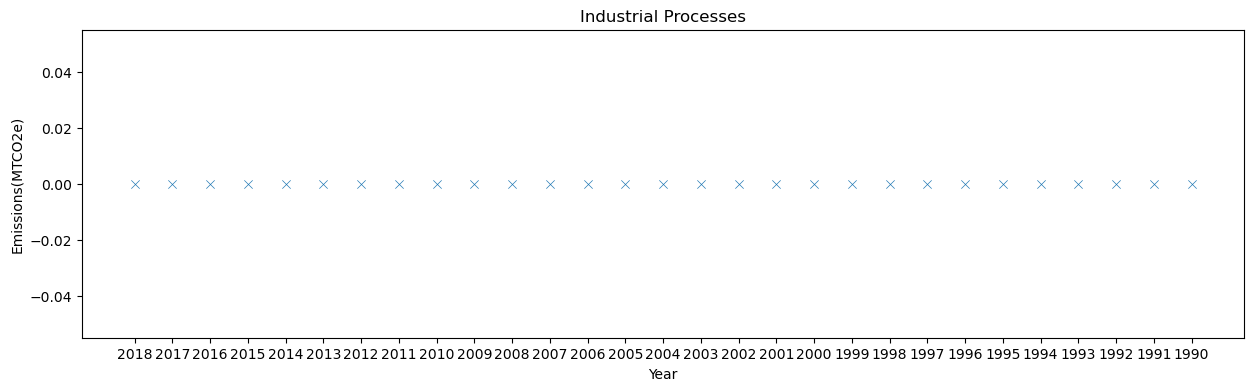

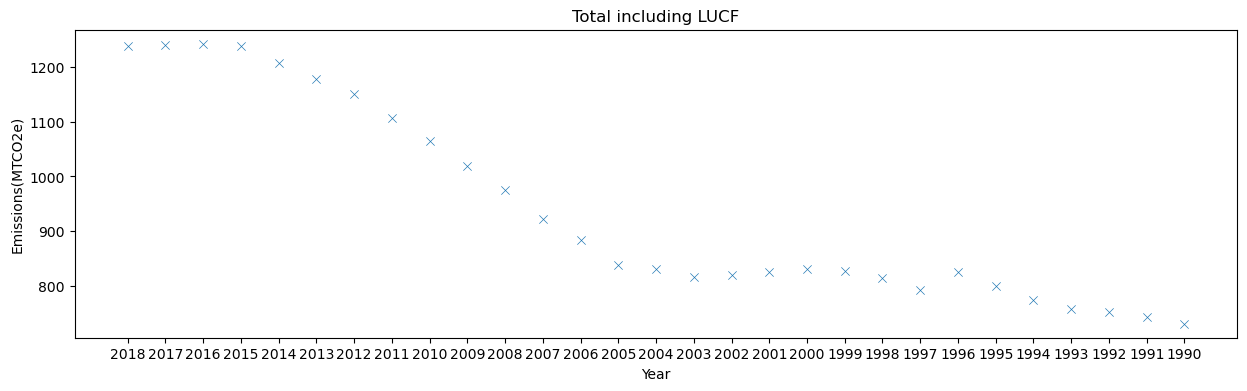

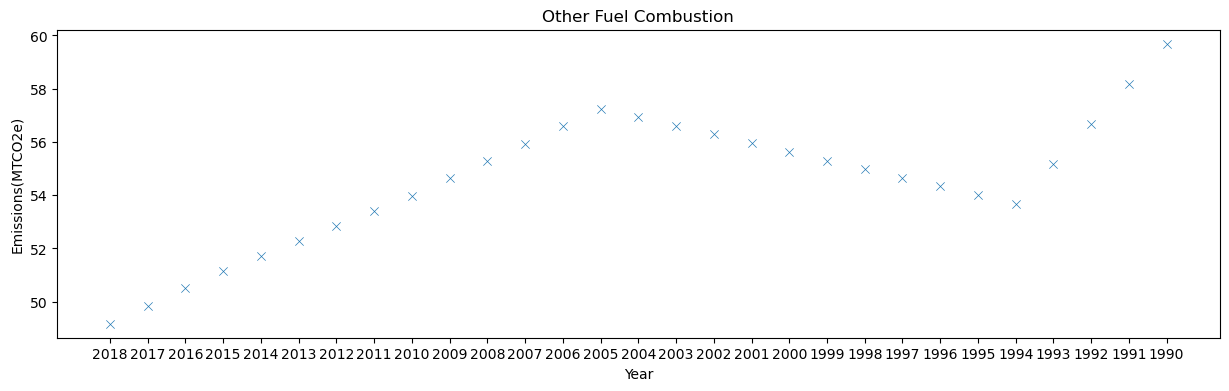

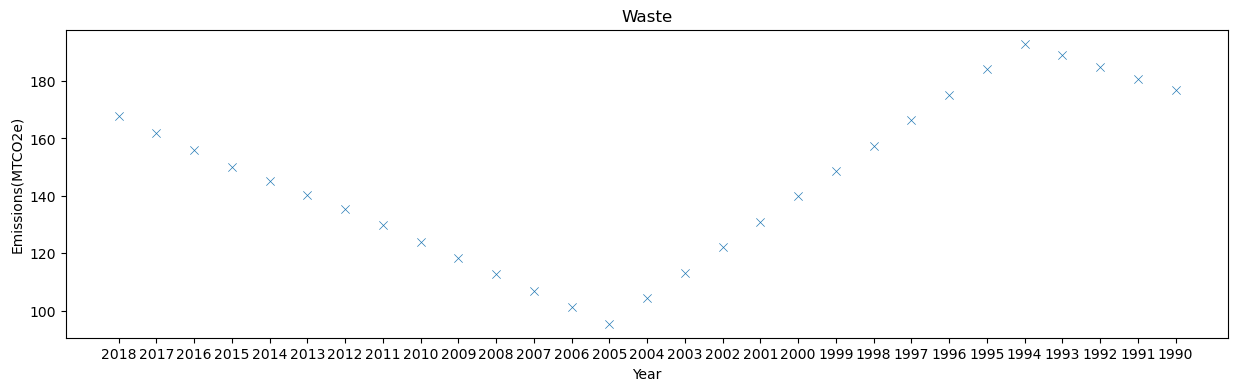

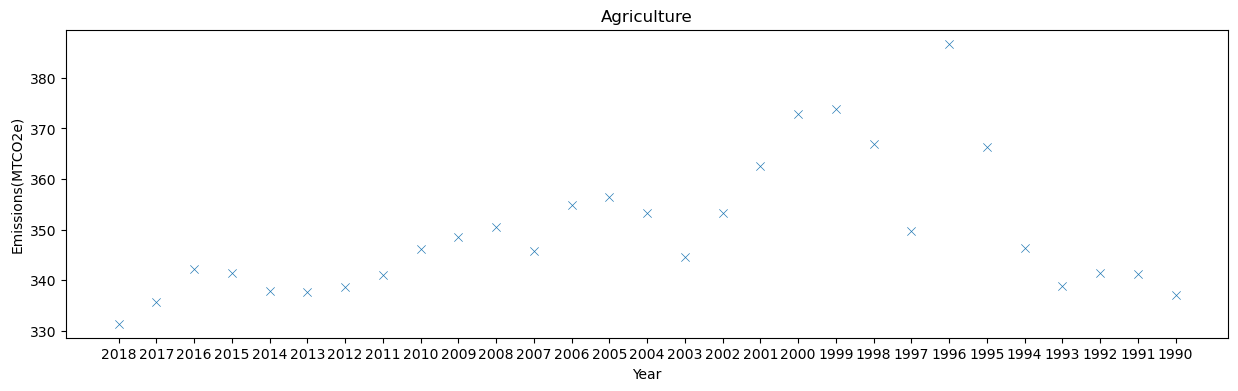

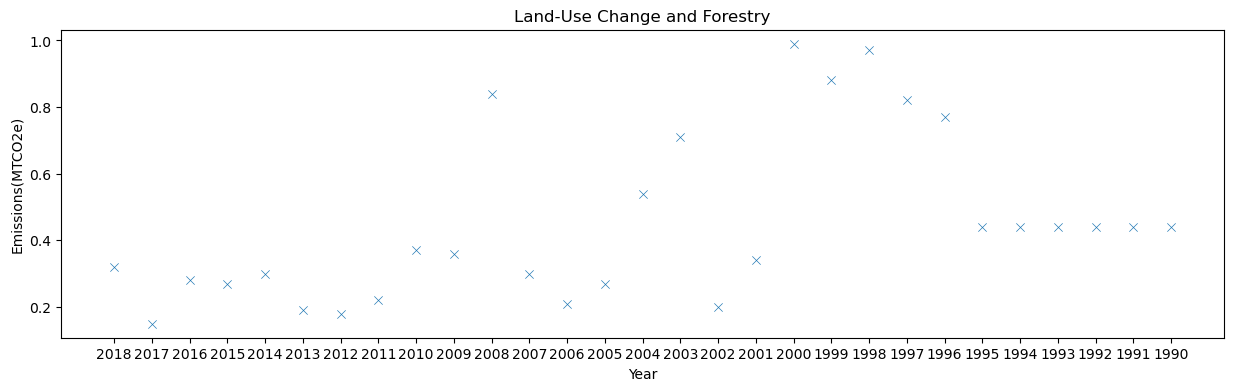

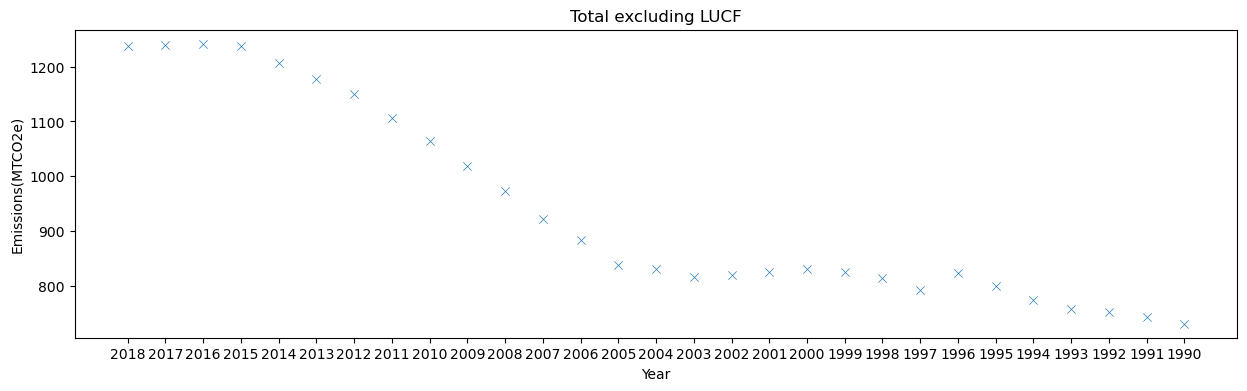

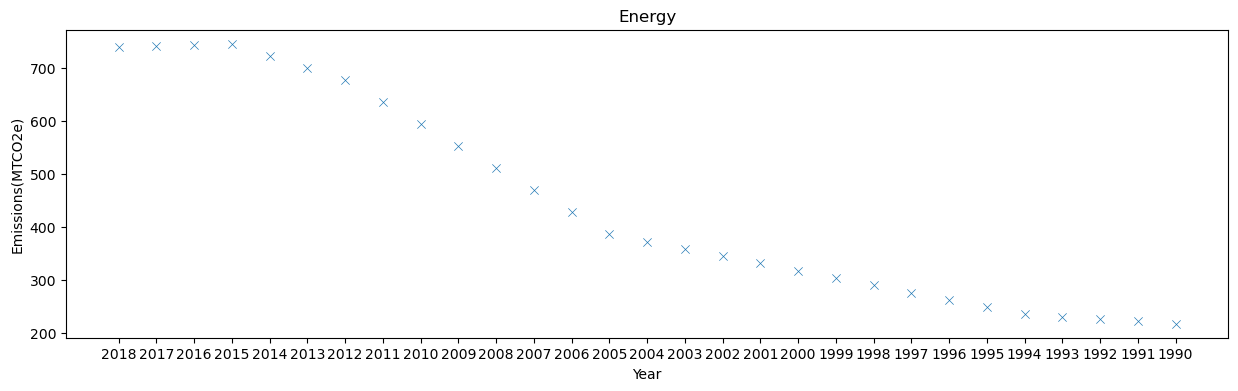

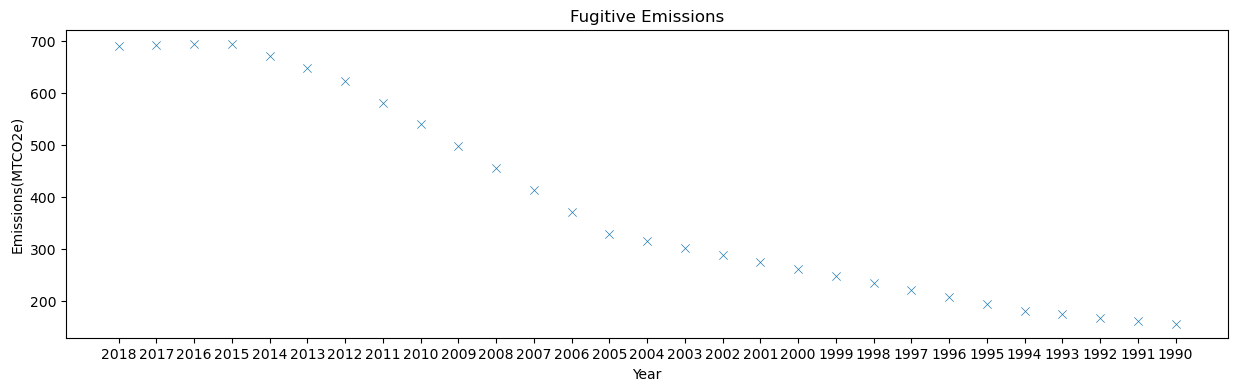

In [70]:
for n in col_china:
    plt.figure(figsize=(15,4))
    sns.scatterplot(x=df_china['index'][4:],y=df_china[n][4:],marker='x')
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_china[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 2. Russia

In [18]:
df_russia = df[df['Country']=='Russia'].T.reset_index()

In [19]:
df_russia

,index,1276,1277,1278,1279,1280,1281,1282,1283,1284
0,Country,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia
1,Sector,Waste,Industrial Processes,Agriculture,Other Fuel Combustion,Total including LUCF,Energy,Land-Use Change and Forestry,Total excluding LUCF,Fugitive Emissions
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,114.3,0.59,51.14,3.17,853.0,683.54,3.44,849.57,680.37
5,2017,113.57,0.59,50.66,3.19,852.12,685.36,1.95,850.17,682.17
6,2016,112.83,0.59,51.96,3.21,856.0,687.18,3.44,852.55,683.97
7,2015,110.38,0.58,52.83,3.48,837.01,671.78,1.45,835.56,668.3
8,2014,107.7,0.56,54.35,3.44,833.59,667.61,3.37,830.22,664.16
9,2013,103.67,0.58,53.82,3.4,827.06,667.58,1.42,825.64,664.17


In [20]:
col_russia = df_russia.columns.tolist()
col_russia.pop(0)

'index'

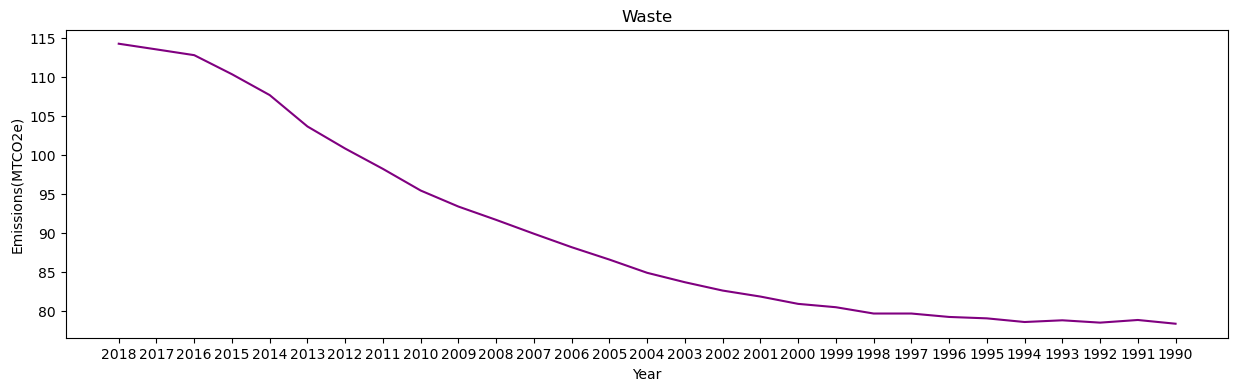

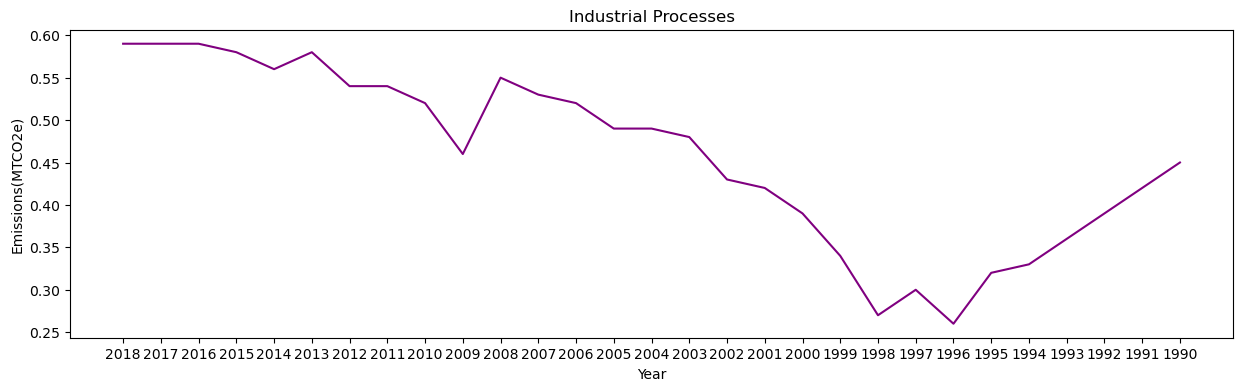

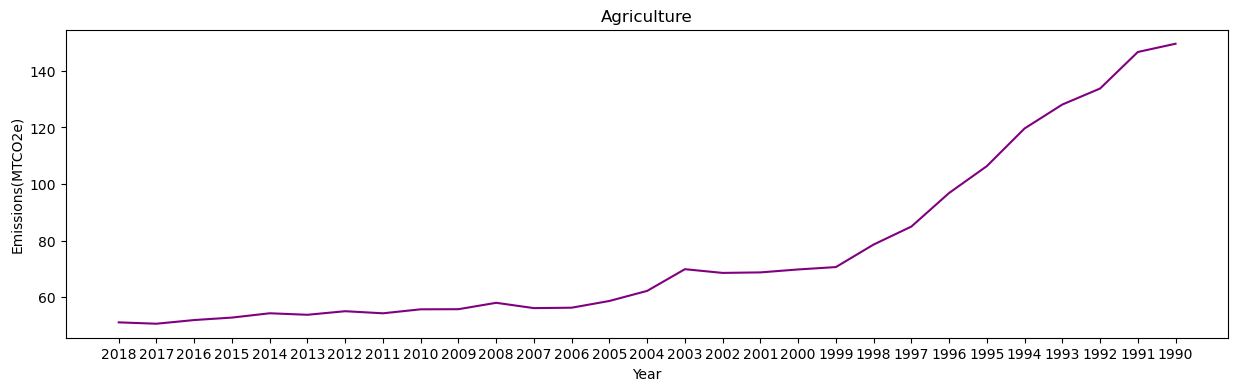

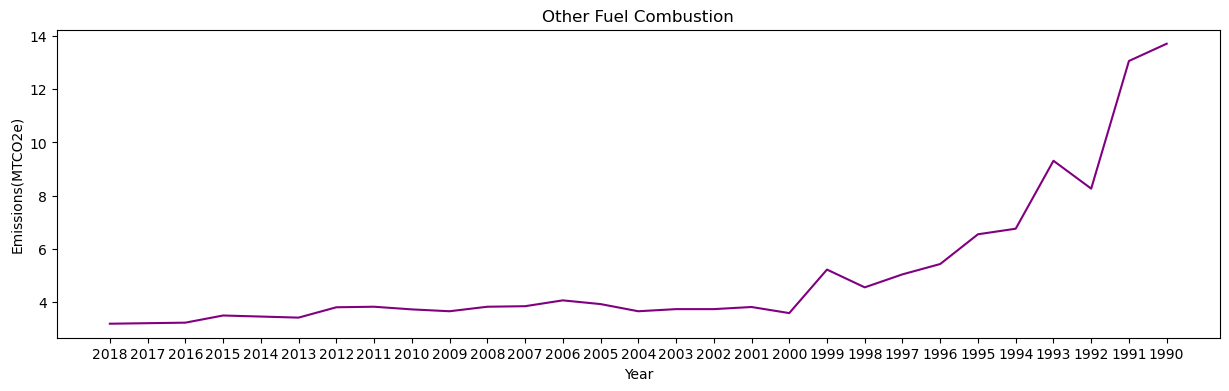

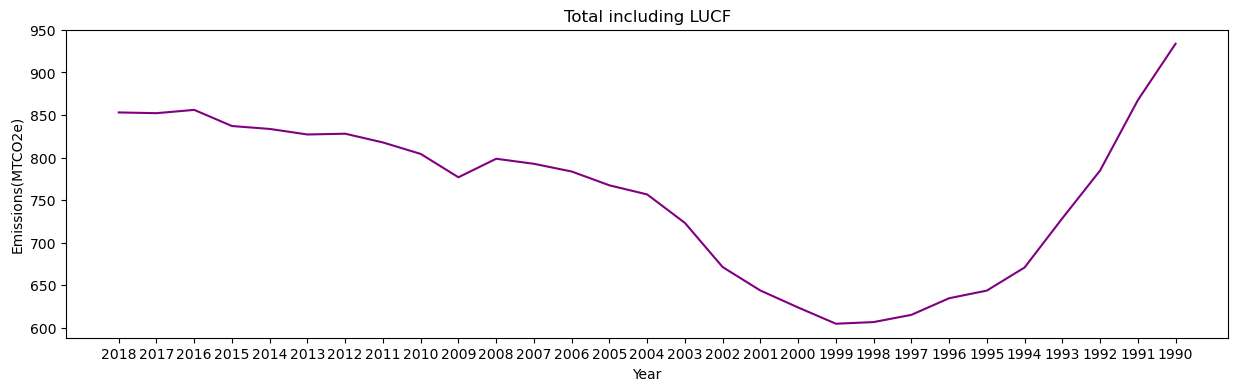

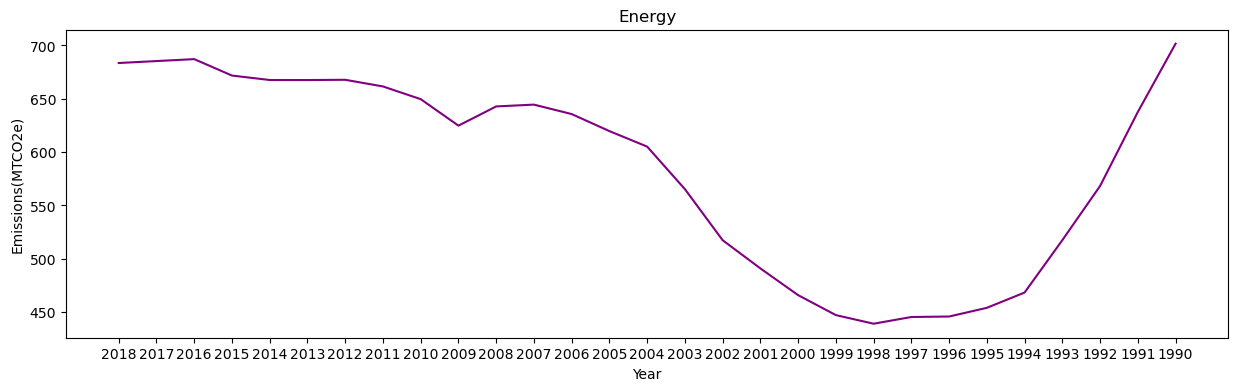

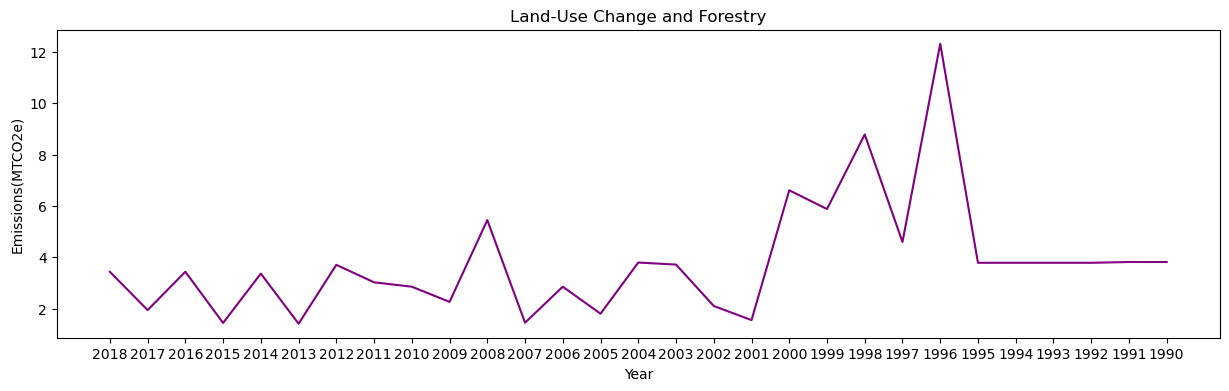

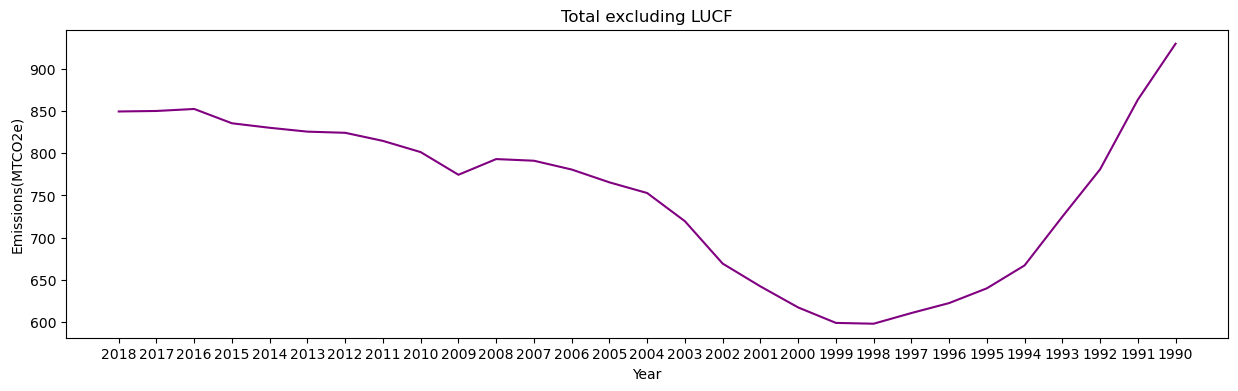

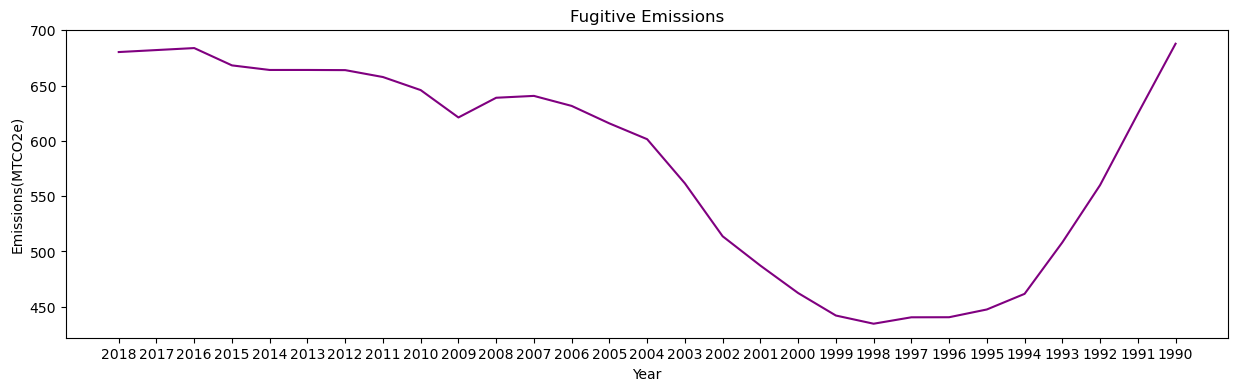

In [71]:
for n in col_russia:
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df_russia['index'][4:],y=df_russia[n][4:],color='purple')
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_russia[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 3. United States

In [22]:
df_us = df[df['Country']=='United States'].T.reset_index()

In [23]:
df_us

,index,1654,1655,1656,1657,1658,1659,1660,1661,1662
0,Country,United States,United States,United States,United States,United States,United States,United States,United States,United States
1,Sector,Industrial Processes,Land-Use Change and Forestry,Total including LUCF,Total excluding LUCF,Waste,Other Fuel Combustion,Energy,Agriculture,Fugitive Emissions
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,0.28,1.18,623.77,622.59,126.52,10.98,293.6,202.19,282.62
5,2017,0.28,1.28,615.77,614.5,125.45,10.98,289.99,198.78,279.01
6,2016,0.28,0.69,609.89,609.2,124.38,10.98,286.37,198.17,275.39
7,2015,0.21,1.1,618.27,617.17,128.67,11.74,296.52,191.76,284.78
8,2014,0.16,0.64,621.45,620.81,129.56,13.15,299.63,191.45,286.48
9,2013,0.11,0.62,619.02,618.41,130.06,13.45,297.31,190.92,283.86


In [24]:
col_us = df_us.columns.tolist()
col_us.pop(0)

'index'

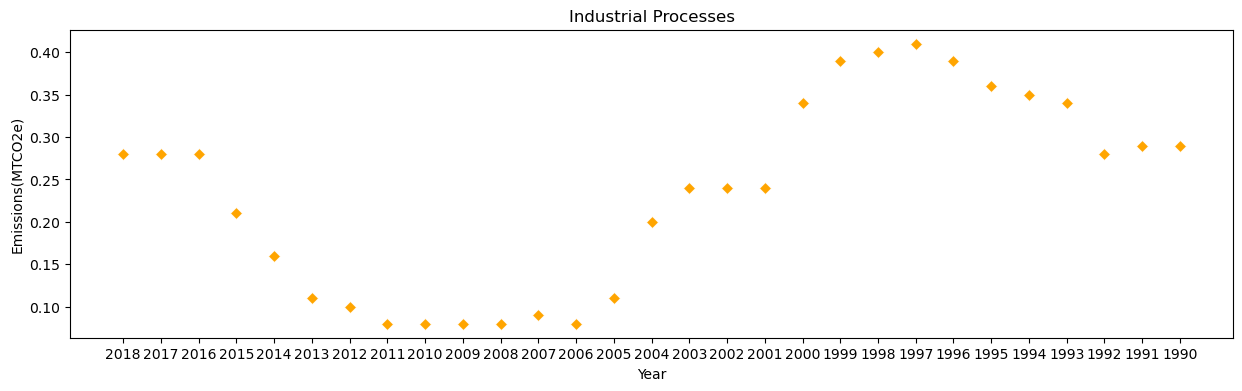

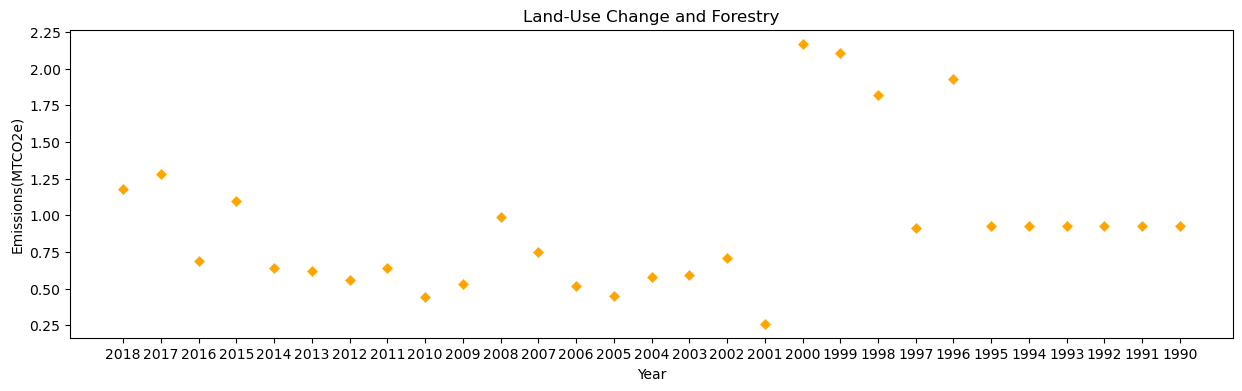

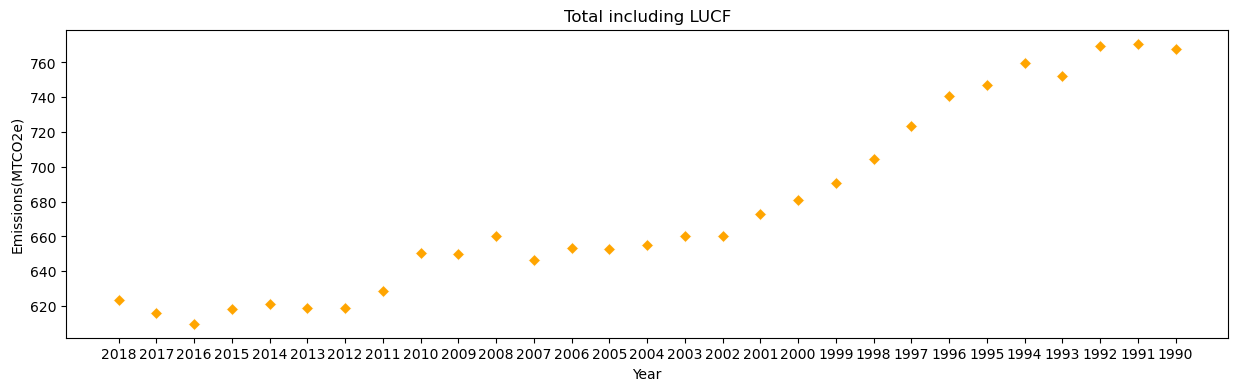

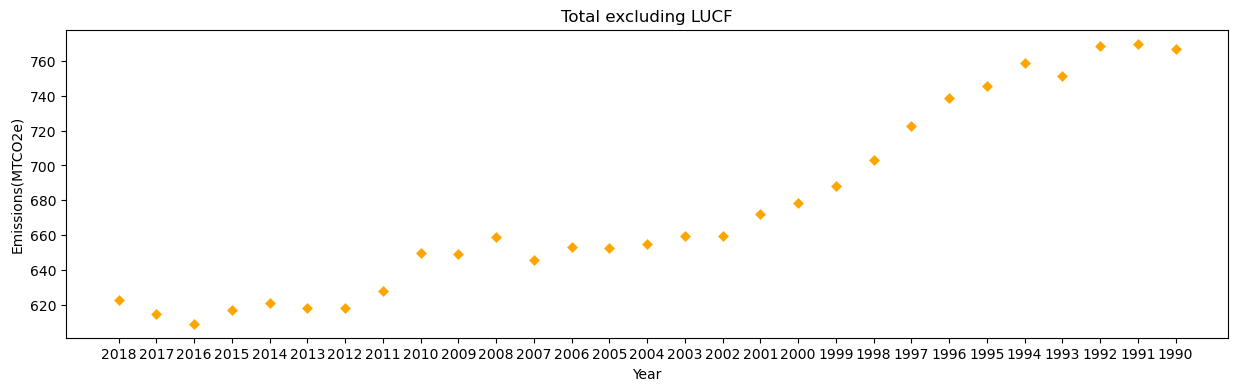

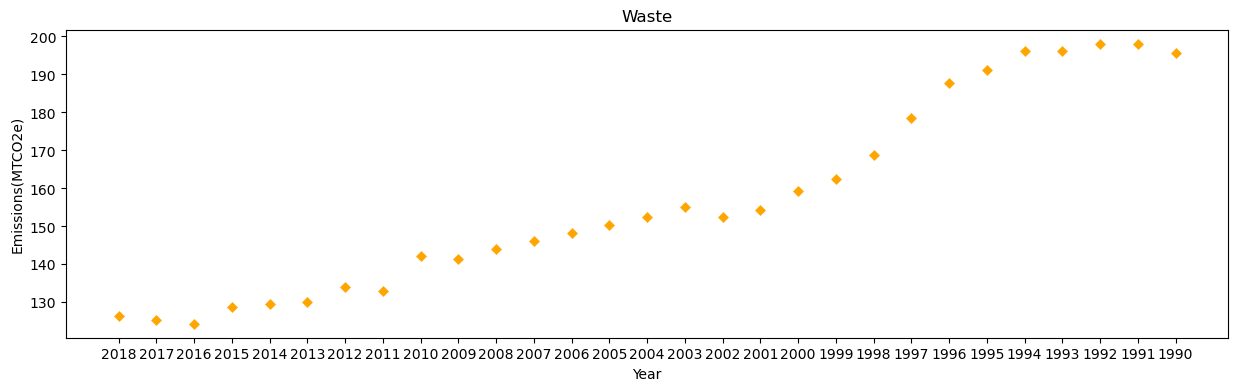

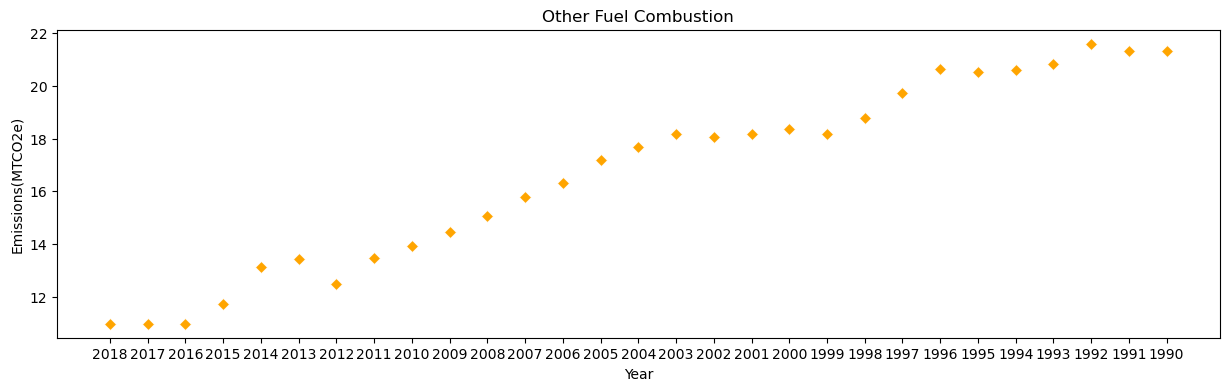

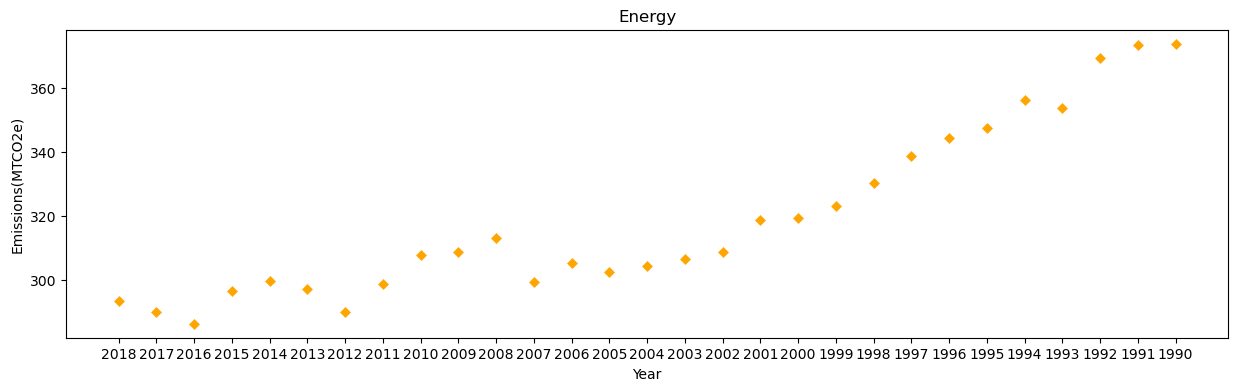

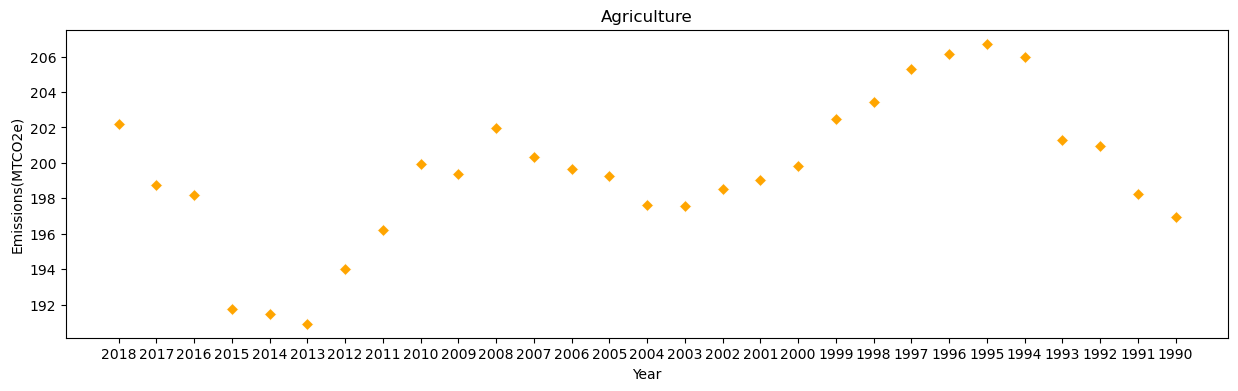

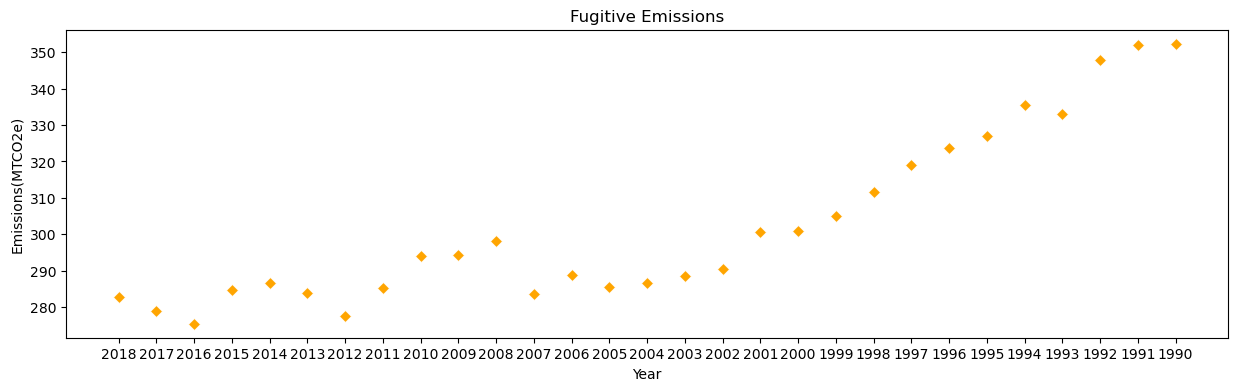

In [55]:
for n in col_us:
    plt.figure(figsize=(15,4))
    sns.scatterplot(x=df_us['index'][4:],y=df_us[n][4:],marker='D',color='orange')
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_us[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 4. India

In [26]:
df_india = df[df['Country']=='India'].T.reset_index()

In [27]:
df_india

,index,688,689,690,691,692,693,694,695,696
0,Country,India,India,India,India,India,India,India,India,India
1,Sector,Total excluding LUCF,Energy,Other Fuel Combustion,Land-Use Change and Forestry,Industrial Processes,Fugitive Emissions,Waste,Total including LUCF,Agriculture
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,666.51,99.08,46.11,2.83,0.13,52.97,68.81,669.34,498.49
5,2017,661.61,99.34,46.11,3.43,0.13,53.22,67.88,665.04,494.26
6,2016,657.69,99.59,46.12,2.11,0.13,53.47,66.96,659.81,491.01
7,2015,652.0,99.85,46.13,1.61,0.13,53.73,66.03,653.61,485.98
8,2014,653.67,100.79,46.16,2.1,0.13,54.63,65.09,655.78,487.66
9,2013,653.53,101.73,46.2,2.55,0.13,55.53,64.15,656.08,487.51


In [28]:
col_india = df_india.columns.to_list()
col_india.pop(0)

'index'

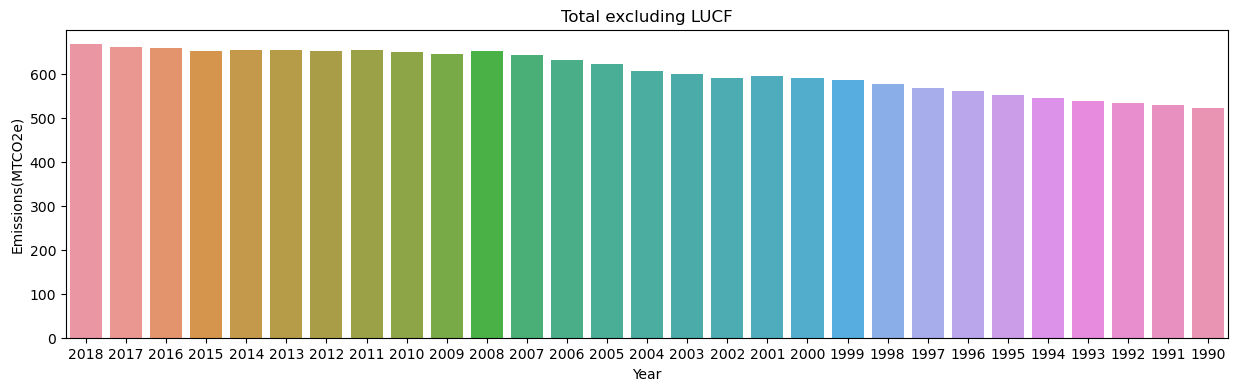

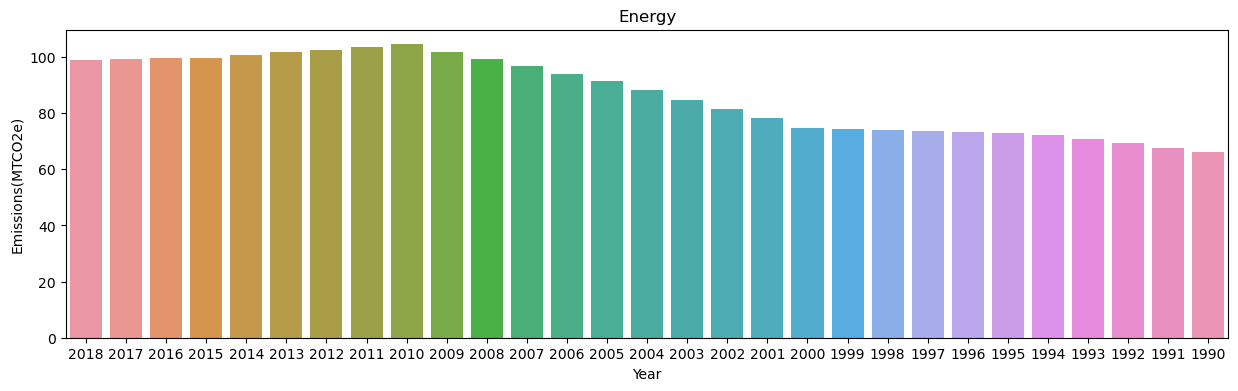

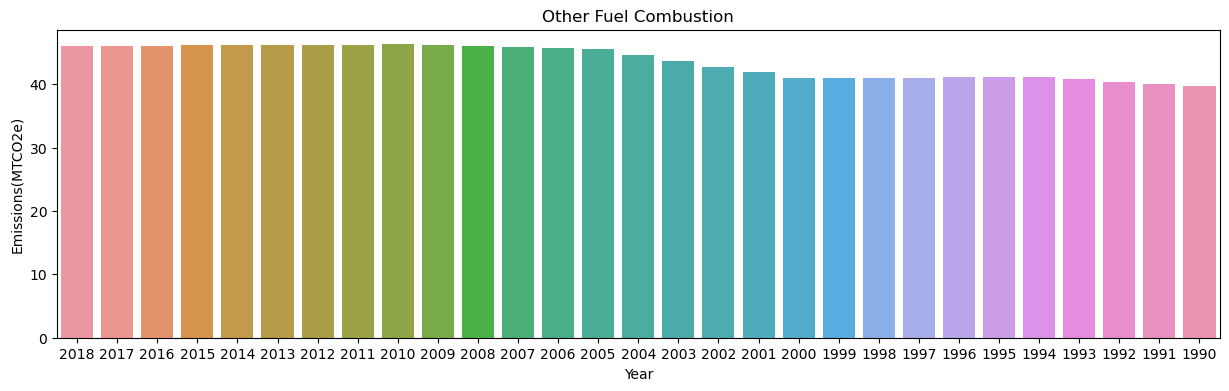

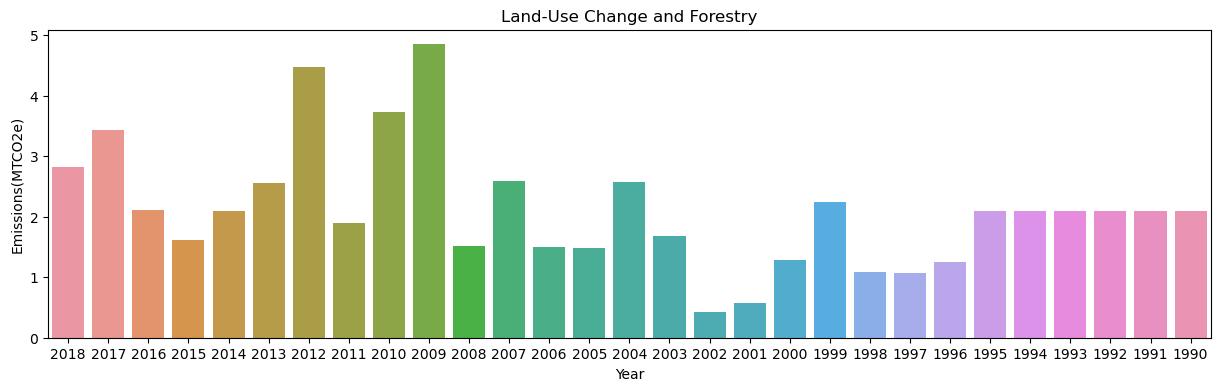

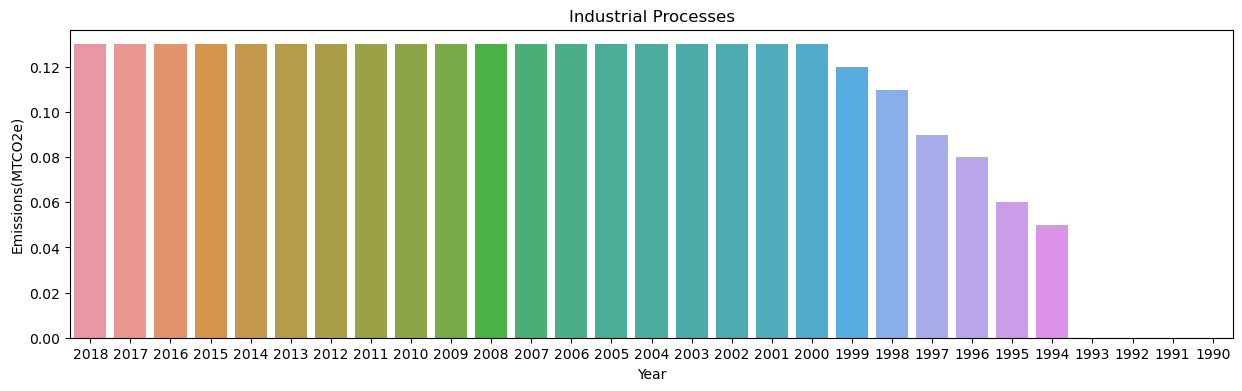

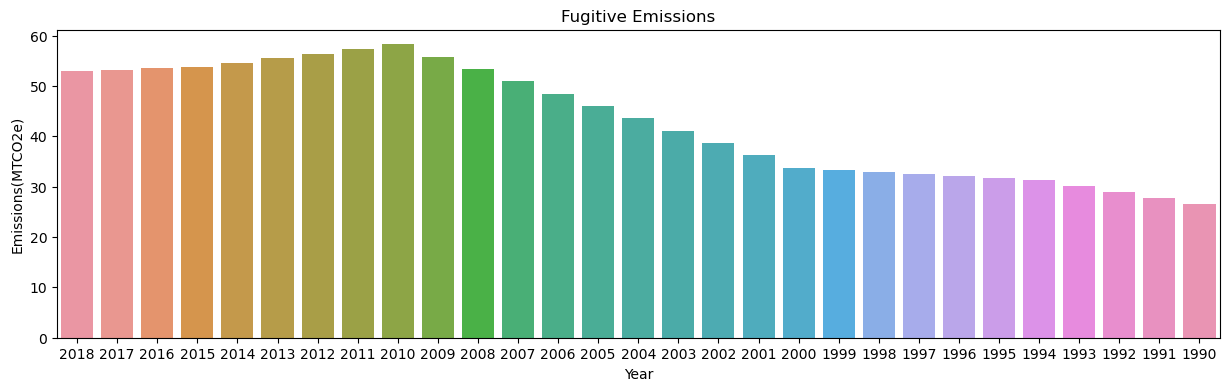

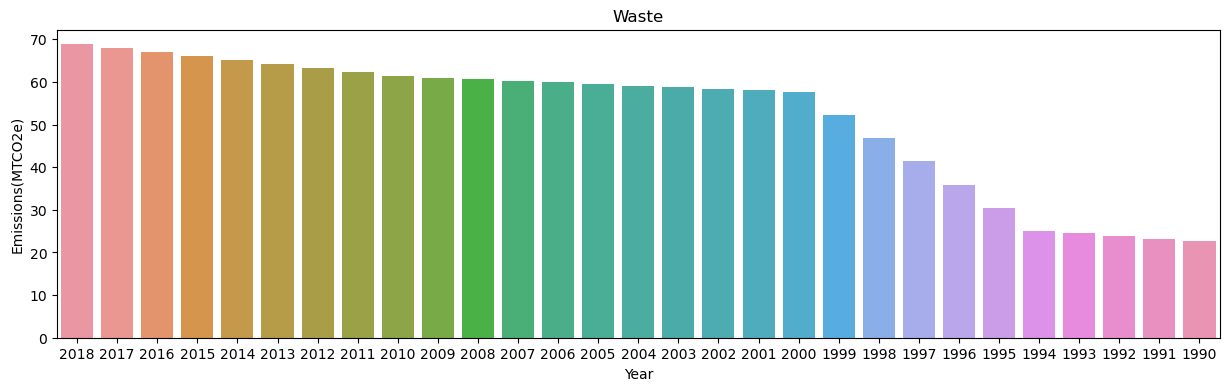

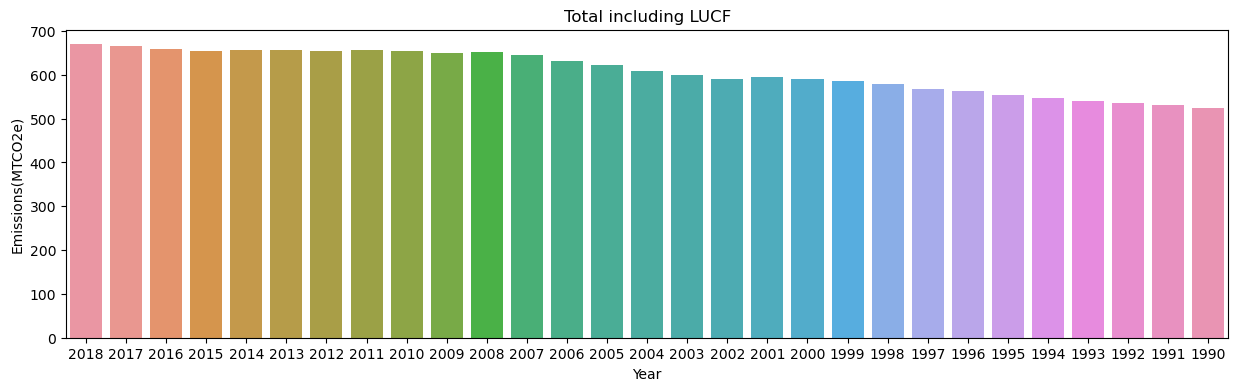

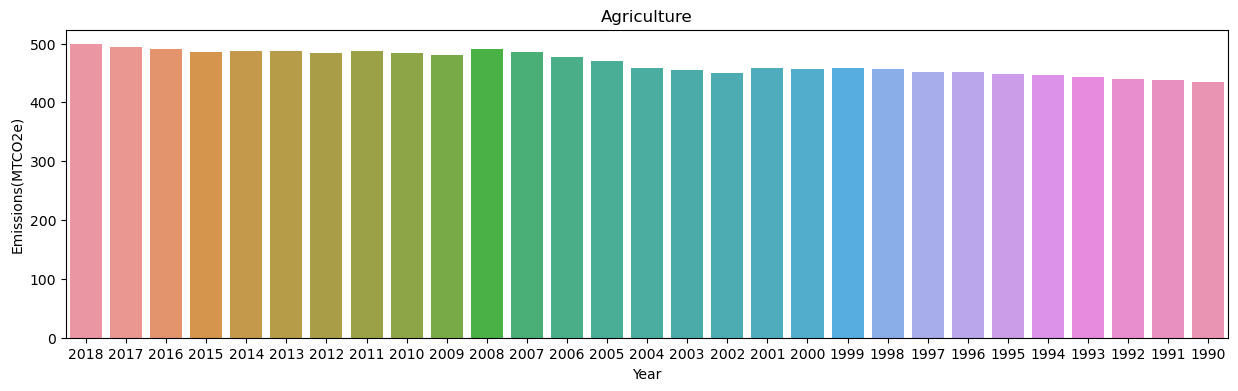

In [47]:
for n in col_india:
    plt.figure(figsize=(15,4))
    sns.barplot(x=df_india['index'][4:],y=df_india[n][4:])
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_india[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 5. Brazil

In [30]:
df_brazil = df[df['Country']=='Brazil'].T.reset_index()

In [31]:
df_brazil

,index,207,208,209,210,211,212,213,214,215
0,Country,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
1,Sector,Waste,Other Fuel Combustion,Energy,Fugitive Emissions,Land-Use Change and Forestry,Agriculture,Total including LUCF,Total excluding LUCF,Industrial Processes
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,67.87,12.17,18.26,6.09,1.74,329.92,418.02,416.28,0.23
5,2017,67.22,12.29,18.26,5.97,5.85,335.96,427.51,421.66,0.23
6,2016,66.57,12.41,18.25,5.85,3.83,339.75,428.63,424.8,0.23
7,2015,65.92,12.52,18.25,5.72,4.6,337.89,426.88,422.28,0.23
8,2014,65.05,12.26,17.74,5.48,2.35,333.33,418.7,416.35,0.23
9,2013,64.18,12.0,17.24,5.24,1.05,330.24,412.93,411.88,0.23


In [32]:
col_brazil = df_brazil.columns.to_list()
col_brazil.pop(0)

'index'

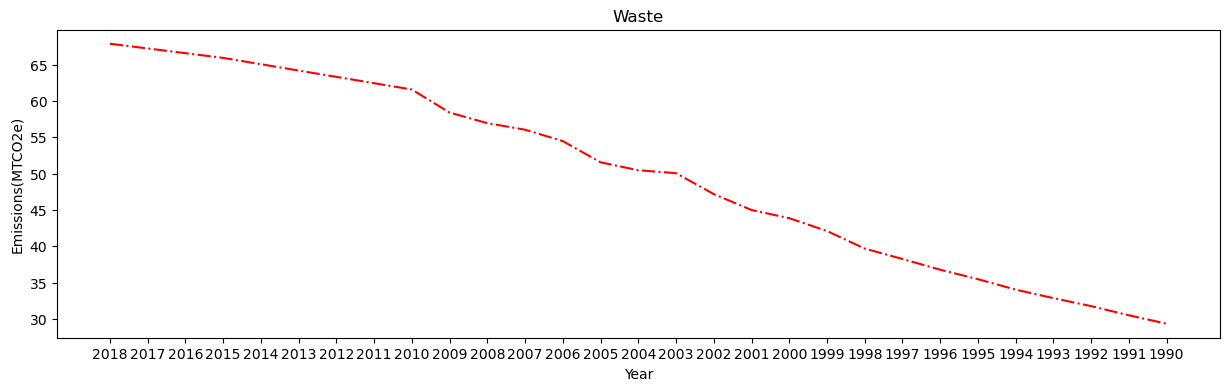

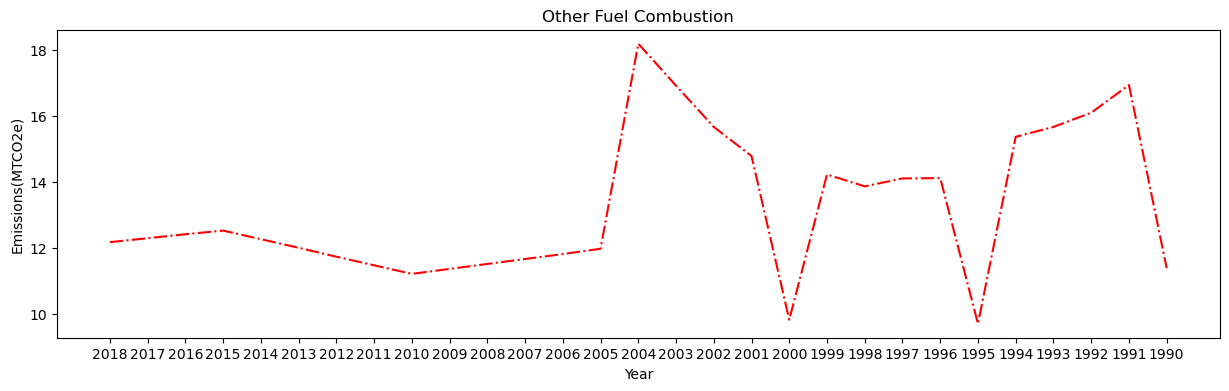

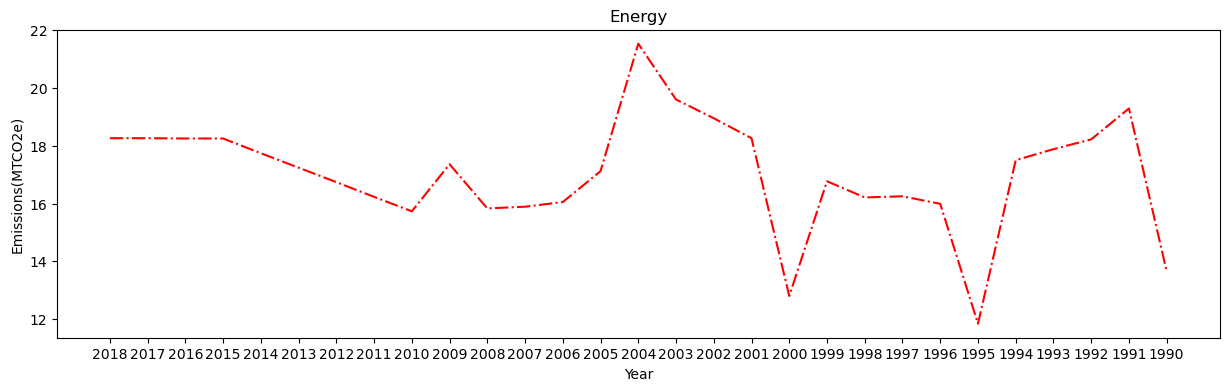

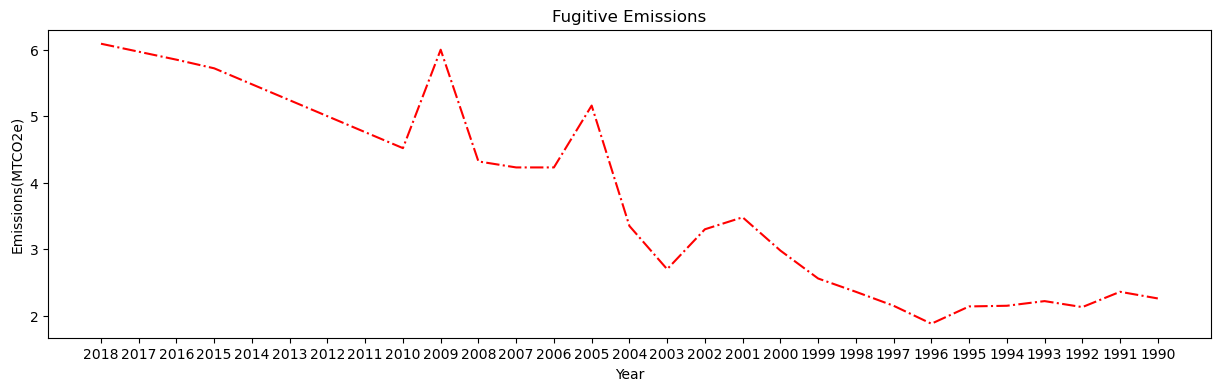

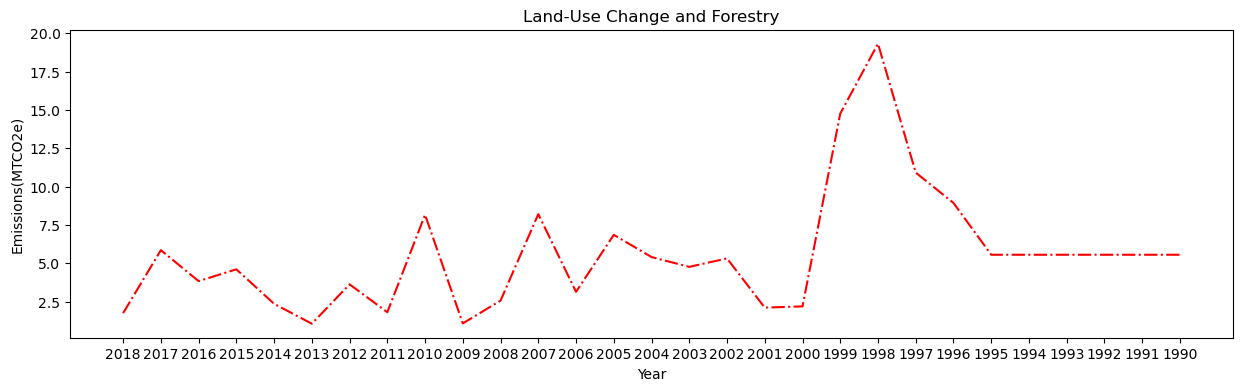

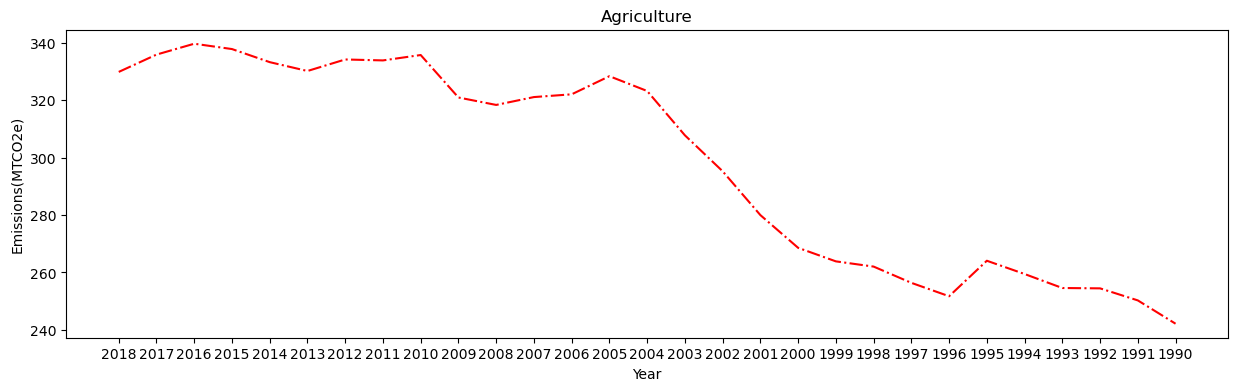

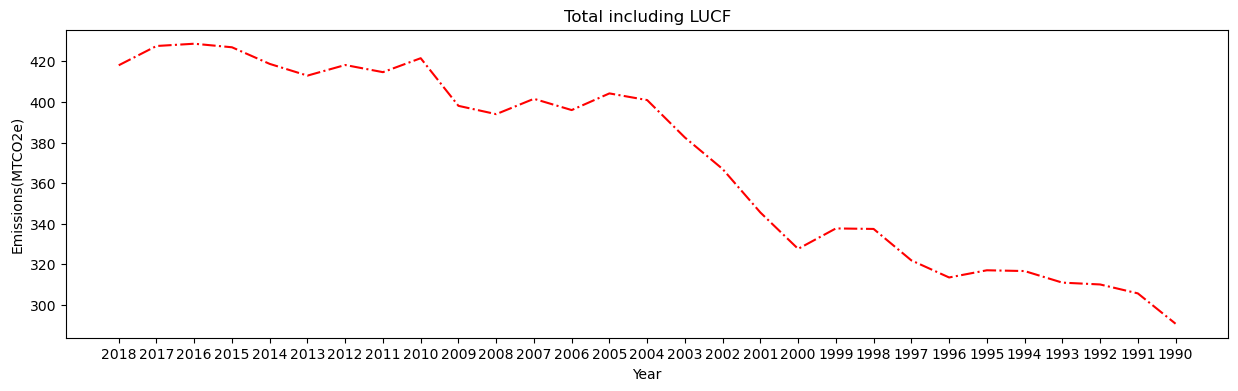

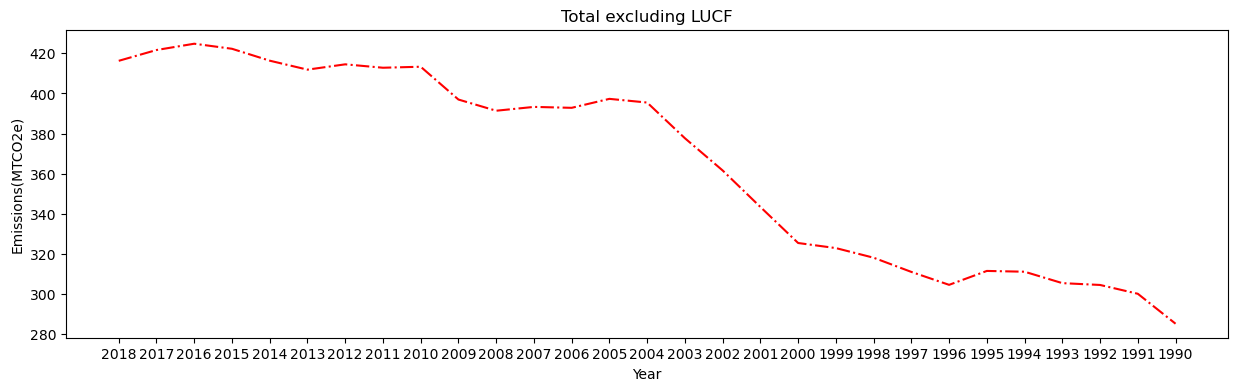

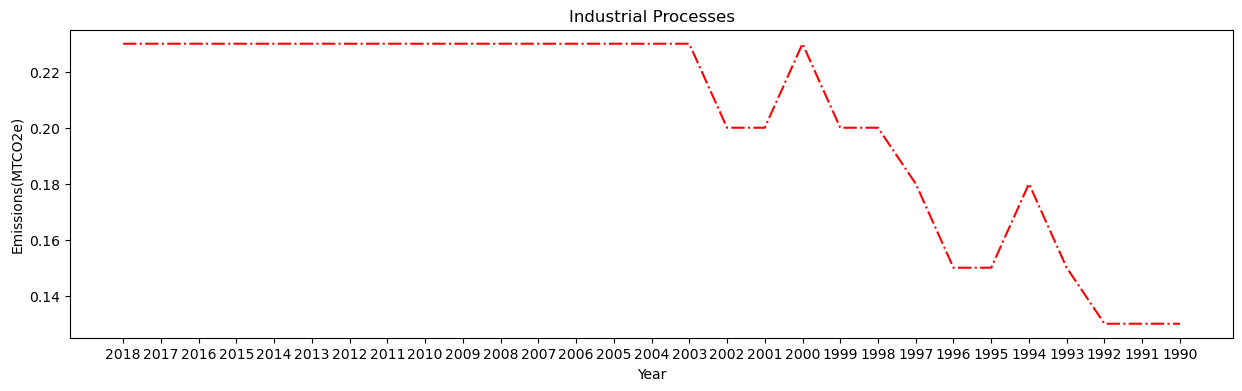

In [63]:
for n in col_brazil:
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df_brazil['index'][4:],y=df_brazil[n][4:],linestyle='-.',color='red')
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_brazil[n][1])
    warnings.filterwarnings('ignore')
    plt.show()